# KNN from scratch

In [1]:
# Importing the important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
# Loading the dataset
df = pd.read_csv('thyroid.txt')
df.head()

,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,...,T4U_measured,FTI_measured,age,sex,TSH,T3,TT4,T4U,FTI,classes
0,0,0,0,0,0,0,0,0,0,0,...,1,1,80,1,1.4,0.8,105.0,0.88,120.0,1
1,0,0,0,0,0,0,0,0,0,0,...,1,1,74,0,0.0,0.7,98.0,0.81,121.0,1
2,0,0,0,0,0,0,0,0,0,0,...,1,1,32,0,1.4,1.1,121.0,1.11,109.0,1
3,0,0,0,0,0,0,0,0,0,0,...,1,1,42,0,2.3,1.1,93.0,0.73,127.0,1
4,0,0,0,0,0,0,0,0,0,0,...,1,1,89,1,0.8,0.8,111.0,0.68,165.0,1


In [3]:
df.describe()

,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,...,T4U_measured,FTI_measured,age,sex,TSH,T3,TT4,T4U,FTI,classes
count,3152.000000,3152.000000,3152.000000,3152.000000,3152.000000,3152.000000,3152.000000,3152.000000,3152.000000,3152.000000,...,3152.000000,3152.000000,3152.000000,3152.000000,3152.000000,3152.000000,3152.000000,3152.000000,3152.000000,3152.000000
mean,0.145305,0.017449,0.013325,0.032995,0.075825,0.077094,0.019987,0.030774,0.012690,0.000635,...,0.921320,0.921637,51.359772,0.295051,5.689591,1.992291,109.016783,0.983284,114.809613,0.091371
std,0.352464,0.130959,0.114680,0.178652,0.264760,0.266783,0.139979,0.172733,0.111952,0.025186,...,0.269282,0.268785,19.226176,0.456138,22.953469,1.036009,45.085350,0.234424,59.028114,0.288181
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,35.000000,0.000000,0.000000,1.400000,83.000000,0.850000,90.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,54.000000,0.000000,0.700000,1.900000,104.000000,0.960000,107.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,67.000000,1.000000,2.200000,2.400000,128.000000,1.070000,128.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,98.000000,1.000000,530.000000,10.200000,450.000000,2.210000,881.000000,1.000000


### Preprocessing the data

In [4]:
# Divide the data into features and target
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [5]:
# Scale the data
sc = StandardScaler()
X = sc.fit_transform(X)

In [6]:
# Divide the data into train and test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print(X_train.shape, y_train.shape)

(2521, 23) (2521,)


## Implementing KNN from scratch

In [7]:
# Euclidean Distance
def euclidean_distance(data1, data2):
    """
    Parameters:
    data1: point no. 1
    data2: point no. 2
    
    Returns:
    euclidiean distance between both the points
    """
    distance = 0
    for i in range(data2.shape[0]):
        distance += np.square(data1[i] - data2[i])
    return np.sqrt(distance)

In [8]:
# KNN to give out the result directly
def knn(train_x, train_y, dis_func, sample, k):
    """
    Parameters:
    train_x: training samples
    train_y: corresponding labels
    dis_func: calculates distance
    sample: one test sample
    k: number of nearest neighbors
    
    Returns:
    cl: class of the sample
    """
    
    distances = {}
    for i in range(len(train_x)):
        d = dis_func(sample, train_x[i])
        distances[i] = d
    sorted_dist = sorted(distances.items(), key = lambda x : (x[1], x[0]))
    
    # take k nearest neighbors
    neighbors = []
    for i in range(k):
        neighbors.append(sorted_dist[i][0])
    
    #convert indices into classes
    classes = [train_y.iloc[c] for c in neighbors]
    
    #count each classes in top k
    from collections import Counter
    counts = Counter(classes)
    
    #take vote of max number of samples of a class
    list_values = list(counts.values())
    list_keys = list(counts.keys())
    cl = list_keys[list_values.index(max(list_values))]
    
    return cl

In [9]:
sl = knn(X_train, y_train, euclidean_distance, X_test[10], 5)

### Testing our model with different values of k

In [12]:
def get_accuracy(test_x, test_y, train_x, train_y, k):
    correct = 0
    for i in range(len(test_x)):
        sample = test_x[i]
        true_label = test_y.iloc[i]
        predicted_label_euclidean = knn(train_x, train_y, euclidean_distance, sample, k)
        if predicted_label_euclidean == true_label:
            correct += 1
    
    accuracy = (correct / len(test_x)) * 100
    
    print("Model accuracy with k = %d is %.2f" %(k, accuracy))
    return accuracy

In [21]:
diff_k = [3, 5, 7, 9]
diff_acc = [0] * len(diff_k)
for i in range(len(diff_k)):
    diff_acc[i] = get_accuracy(X_test, y_test, X_train, y_train, diff_k[i])

print(diff_acc)

Model accuracy with k = 3 is 95.25
Model accuracy with k = 5 is 94.93
Model accuracy with k = 7 is 94.29
Model accuracy with k = 9 is 94.14
[95.24564183835183, 94.92868462757528, 94.29477020602218, 94.13629160063391]


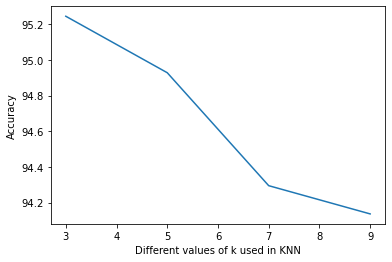

In [22]:
# Plotting the graph of k against accuracy
plt.plot(diff_k, diff_acc)
plt.xlabel('Different values of k used in KNN')
plt.ylabel('Accuracy')
plt.show()